In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import koreanize_matplotlib
from wordcloud import WordCloud
import warnings

warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [251]:
df = pd.read_excel(r'C:\Users\a\Desktop\mini_project\07 통계 추정(아이리스 위스키)\Irish Whiskey Sales by Volume.xlsx')

In [252]:
df.head(20)

,Category,Quality,Country,Year,Cases
0,Irish Whiskey,Standard,United States,1990,243000.0
1,Irish Whiskey,Standard,United States,1991,214000.0
2,Irish Whiskey,Standard,United States,1992,219500.0
3,Irish Whiskey,Standard,United States,1993,225000.0
4,Irish Whiskey,Standard,United States,1994,239500.0
5,Irish Whiskey,Standard,United States,1995,249000.0
6,Irish Whiskey,Standard,United States,1996,259000.0
7,Irish Whiskey,Standard,United States,1997,279500.0
8,Irish Whiskey,Standard,United States,1998,296750.0
9,Irish Whiskey,Standard,United States,1999,322000.0


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4131 entries, 0 to 4130
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  4131 non-null   object 
 1   Quality   4131 non-null   object 
 2   Country   4131 non-null   object 
 3   Year      4131 non-null   int64  
 4   Cases     2794 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 161.5+ KB


In [254]:
df.sample(10)

,Category,Quality,Country,Year,Cases
3255,Irish Whiskey,Super Premium,Italy,2005,NaN
2523,Irish Whiskey,Premium,DF Portugal,2002,175.0
422,Irish Whiskey,Standard,DF Nordic Countries - (All Countries),2007,44050.0
2338,Irish Whiskey,Premium,DF Netherlands,2006,975.0
3091,Irish Whiskey,Super Premium,Denmark,2003,NaN
2201,Irish Whiskey,Premium,Japan,2004,1200.0
659,Irish Whiskey,Standard,Spain,2001,65750.0
2680,Irish Whiskey,Premium,DF Austria,1997,NaN
3246,Irish Whiskey,Super Premium,Italy,1996,NaN
3379,Irish Whiskey,Super Premium,DF France,1994,NaN


In [255]:
df.dropna(inplace=True)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2794 entries, 0 to 4111
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  2794 non-null   object 
 1   Quality   2794 non-null   object 
 2   Country   2794 non-null   object 
 3   Year      2794 non-null   int64  
 4   Cases     2794 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 131.0+ KB


In [257]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing,missing%,unique,count
Category,object,0,0.000000,1,2794
Quality,object,0,0.000000,3,2794
Country,object,0,0.000000,76,2794
Year,int64,0,0.000000,27,2794
Cases,float64,0,0.000000,1080,2794


In [258]:
df['Category'].value_counts()

Category
Irish Whiskey    2794
Name: count, dtype: int64

In [259]:
df['Quality'].value_counts()

Quality
Standard         1263
Premium          1090
Super Premium     441
Name: count, dtype: int64

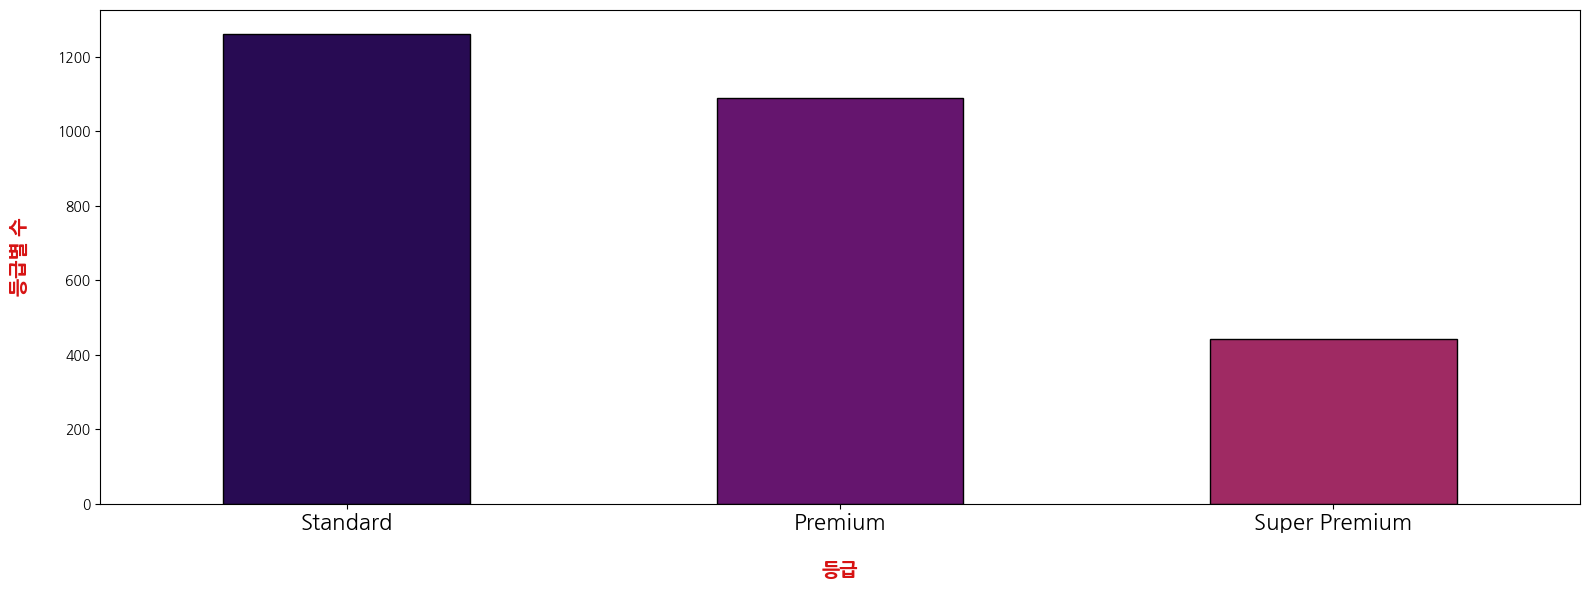

In [260]:
plt.figure(figsize = (16, 6))

df["Quality"].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('등급', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('등급별 수', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)

plt.tight_layout()
plt.show()

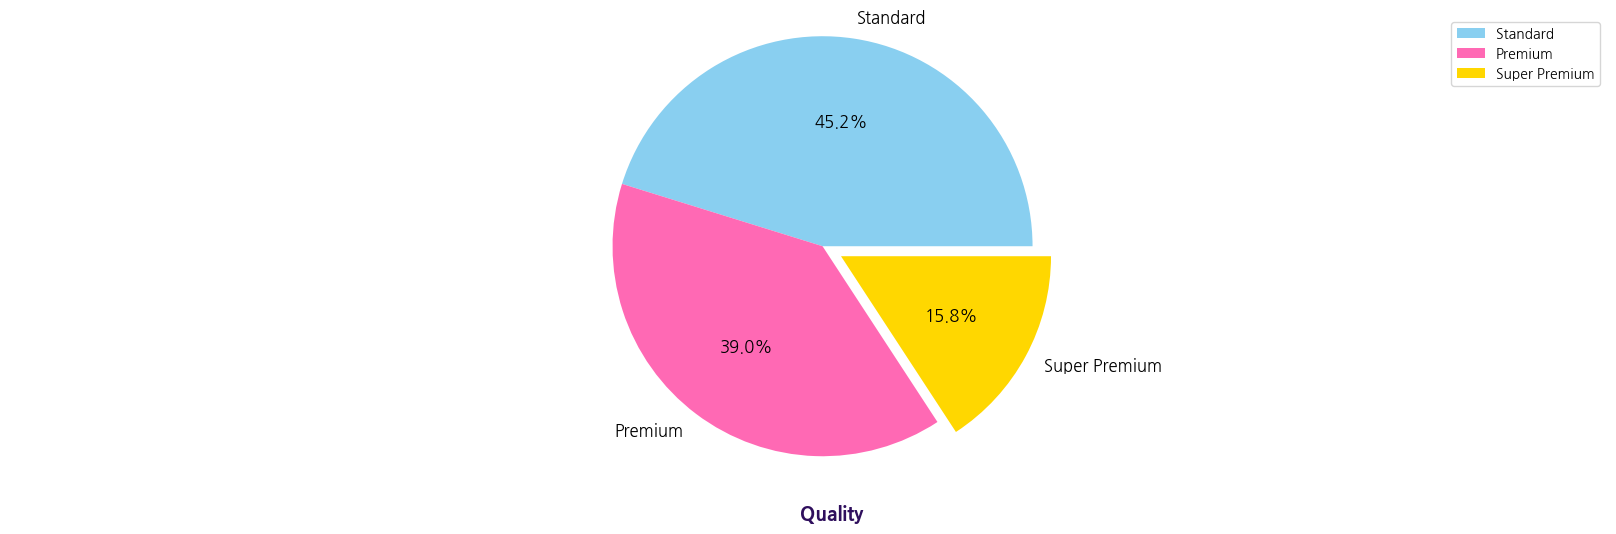

In [261]:
plt.figure(figsize = (20, 6))

counts = df["Quality"].value_counts()
explode = (0, 0.0,  0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.xlabel('Quality', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel(' ', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

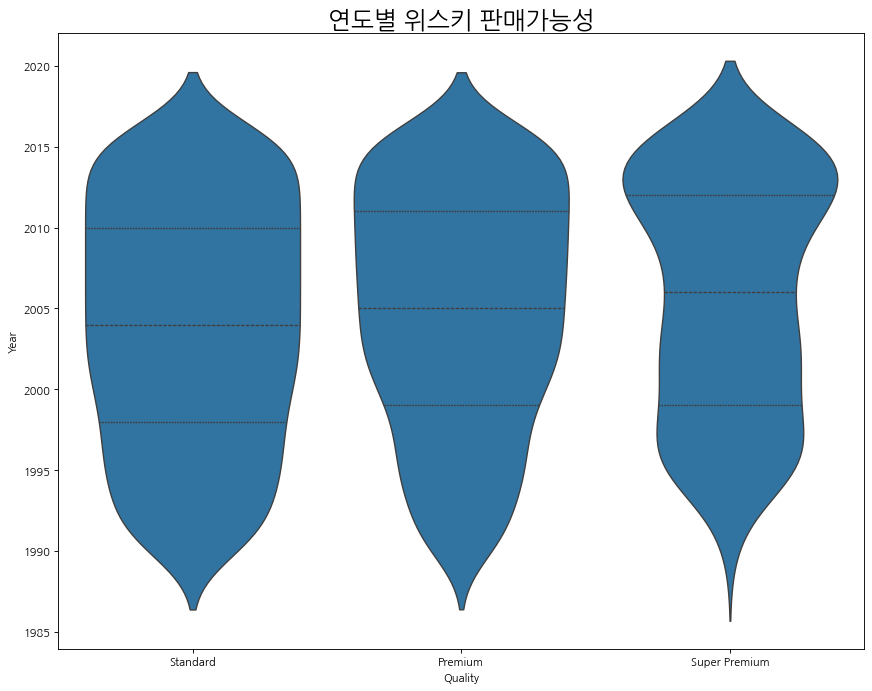

In [262]:
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='Quality', y='Year', data=df, scale='width', inner='quartile')

plt.title('연도별 위스키 판매가능성', fontsize=22)
plt.show()

#### 30만개 데이터

In [263]:
df2 = pd.read_csv(r'C:\Users\a\Desktop\mini_project\07 통계 추정(아이리스 위스키)\userratings_raw_xx.csv')

In [264]:
df2.head(10)

,Whisky,Age,Alc%,Volume,No. of Bottles,Cask Number,Votes,Avg. Rating,User Rating,user
0,Laphroaig 21-year-old Friends of Laphroaig,21,48.4 % Vol.,350 ml,-,-,458,90.07,93,wsp
1,Miltonduff 1978 CA Authentic Collection,39,44.6 % Vol.,700 ml,204,-,75,90.3,92,wsp
2,Springbank 2001 BA Blackadder Statement Editio...,17,58.5 % Vol.,700 ml,96,130,22,92.6,92,wsp
3,Glendronach 25-year-old Grandeur,25,50.6 % Vol.,700 ml,1180,Batch 7,94,90.79,92,wsp
4,Lagavulin 16-year-old White Horse Distillers,16,43.0 % Vol.,700 ml,-,-,592,89.73,92,wsp
5,Macallan 1987 MoS Angel's Choice,-,48.9 % Vol.,350 ml,133,MoS 17027,11,92.83,92,wsp
6,Springbank 1996 WN,21,58.1 % Vol.,700 ml,180,471,120,90.68,92,wsp
7,Clynelish 1992 HiSp Highproof,26,50.1 % Vol.,700 ml,193,CY9219,91,91.47,92,wsp
8,A Speyside Distillery 1973 WD,43,52.2 % Vol.,700 ml,221,12,119,91.62,92,wsp
9,Laphroaig Original Cask Strength Green Stripe,10,57.3 % Vol.,333 ml,-,-,38,91.11,92,wsp


In [265]:
df2.columns

Index(['Whisky', 'Age', 'Alc%', 'Volume', 'No. of Bottles', 'Cask Number',
       'Votes', 'Avg. Rating', 'User Rating', 'user'],
      dtype='object')

In [266]:
df2_Irish_Whiskey = df2[df2['Whisky'].str.contains('Bushmills|Jameson|Red Breast', case=False, na=False)]

df2_Irish_Whiskey.head(5)

,Whisky,Age,Alc%,Volume,No. of Bottles,Cask Number,Votes,Avg. Rating,User Rating,user
380,Bushmills 21-year-old Rare - Matured in Three ...,21,40.0 % Vol.,700 ml,-,-,29,88.41,90,mapl
758,Bushmills 10-year-old,10,40.0 % Vol.,700 ml,-,-,34,79.72,82,mapl
918,Bushmills 1992 The Causeway Collection,28,53.6 % Vol.,700 ml,698,-,59,91.47,93,roka
2069,Bushmills 1988 Distiller's Reserve,-,53.8 % Vol.,700 ml,-,14355,2,84.5,89,stf92
4266,Bushmills 16-year-old Matured in Three Woods,16,40.0 % Vol.,700 ml,-,-,62,86.34,85,vmarcinv


### user 타겟분류

In [267]:
df2_Irish_Whiskey.user.value_counts()

user
maltmartin     71
merl           27
malthead19     24
nidan          22
schengel10     21
               ..
maltsabine      1
dominique69     1
sjaak92         1
andre84         1
grizly007       1
Name: count, Length: 311, dtype: int64

In [268]:
df2_mal = df2_Irish_Whiskey[df2_Irish_Whiskey['user'] == 'maltmartin']

In [269]:
df2_mal['Avg. Rating'].value_counts()

Avg. Rating
82       3
90       3
81       2
86.33    2
88       2
        ..
84.36    1
81.75    1
87.22    1
84.33    1
73.17    1
Name: count, Length: 62, dtype: int64

In [270]:
df2_mal['User Rating'].value_counts()

User Rating
80    9
75    7
85    7
83    5
89    5
88    5
86    5
81    4
84    4
91    4
90    4
87    3
79    3
82    2
77    2
78    1
92    1
Name: count, dtype: int64

In [271]:
df2_mal['Avg. Rating'] = df2_mal['Avg. Rating'].astype('float64')
df2_mal['User Rating'] = df2_mal['User Rating'].astype('float64')

In [272]:
df2_mal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 59233 to 69119
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Whisky          71 non-null     object 
 1   Age             71 non-null     object 
 2   Alc%            67 non-null     object 
 3   Volume          71 non-null     object 
 4   No. of Bottles  71 non-null     object 
 5   Cask Number     71 non-null     object 
 6   Votes           71 non-null     object 
 7   Avg. Rating     71 non-null     float64
 8   User Rating     71 non-null     float64
 9   user            71 non-null     object 
dtypes: float64(2), object(8)
memory usage: 6.1+ KB


### 여기까지 경향 파악

In [273]:
df2_Irish_Whiskey.columns

Index(['Whisky', 'Age', 'Alc%', 'Volume', 'No. of Bottles', 'Cask Number',
       'Votes', 'Avg. Rating', 'User Rating', 'user'],
      dtype='object')

In [274]:
df2_Irish_Whiskey.drop(columns=['No. of Bottles','Cask Number','user','User Rating'],inplace=True)

In [275]:
df2_Irish_Whiskey.set_index(keys = 'Whisky',inplace=True)

In [276]:
df2_Irish_Whiskey.columns = ['Age','Alc','Volume','Votes','Rating']

In [277]:
df2_Irish_Whiskey.isna().sum()

Age        0
Alc       19
Volume     0
Votes      0
Rating     0
dtype: int64

In [278]:
df2_Irish_Whiskey.dropna(inplace=True)

### 잭다니엘 올드 넘버 7 
- 블랜디드 양주는 정확한 년수를 확인할수 없다.

In [279]:
df2_Irish_Whiskey['Age'] = pd.to_numeric(df2_Irish_Whiskey['Age'], errors='coerce')

df2_Irish_Whiskey['Age'].fillna(df2_Irish_Whiskey['Age'].mean(), inplace=True)

df2_Irish_Whiskey['Age'] = df2_Irish_Whiskey['Age'].astype('int32')

In [280]:
df2_Irish_Whiskey['Votes'] = df2_Irish_Whiskey['Votes'].astype('float64')

In [281]:
df2_Irish_Whiskey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, Bushmills 21-year-old Rare - Matured in Three Woods to Jameson Caskmates Stout Edition
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1045 non-null   int32  
 1   Alc     1045 non-null   object 
 2   Volume  1045 non-null   object 
 3   Votes   1045 non-null   float64
 4   Rating  1045 non-null   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 44.9+ KB


In [282]:
df2_Irish_Whiskey['Rating'] = df2_Irish_Whiskey['Rating'].astype('float64')

In [283]:
df2_Irish_Whiskey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, Bushmills 21-year-old Rare - Matured in Three Woods to Jameson Caskmates Stout Edition
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1045 non-null   int32  
 1   Alc     1045 non-null   object 
 2   Volume  1045 non-null   object 
 3   Votes   1045 non-null   float64
 4   Rating  1045 non-null   float64
dtypes: float64(2), int32(1), object(2)
memory usage: 44.9+ KB


In [284]:
Alc2 = []
for i in range(len(df2_Irish_Whiskey)):
    Alc2.append(df2_Irish_Whiskey['Alc'].str.split(' ')[i][0])

In [285]:
df2_Irish_Whiskey.drop(columns='Alc',inplace=True)

In [286]:
df2_Irish_Whiskey['Alc'] = Alc2

In [287]:
df2_Irish_Whiskey['Alc'] = df2_Irish_Whiskey['Alc'].astype('float64')

In [288]:
df2_Irish_Whiskey[df2_Irish_Whiskey['Volume'] == '-'] = 700

In [289]:
df2_Irish_Whiskey['Volume'].value_counts()

Volume
700 ml     855
1000 ml     99
750 ml      49
50 ml       19
200 ml       6
350 ml       5
41 ml        2
71 ml        2
25 ml        2
757 ml       1
40 ml        1
47 ml        1
1125 ml      1
333 ml       1
700          1
Name: count, dtype: int64

In [290]:
df2_Irish_Whiskey['Volume'] = df2_Irish_Whiskey['Volume'].astype(str)

Volume2 = df2_Irish_Whiskey['Volume'].str.split(' ').str[0]

df2_Irish_Whiskey.drop(columns='Volume', inplace=True)
df2_Irish_Whiskey['Volume'] = Volume2

df2_Irish_Whiskey['Volume'] = df2_Irish_Whiskey['Volume'].astype('float64')


In [291]:
df2_Irish_Whiskey.head(10)

,Age,Votes,Rating,Alc,Volume
Whisky,,,,,
Bushmills 21-year-old Rare - Matured in Three Woods,21,29.0,88.41,40.0,700.0
Bushmills 10-year-old,10,34.0,79.72,40.0,700.0
Bushmills 1992 The Causeway Collection,28,59.0,91.47,53.6,700.0
Bushmills 1988 Distiller's Reserve,15,2.0,84.50,53.8,700.0
Bushmills 16-year-old Matured in Three Woods,16,62.0,86.34,40.0,700.0
Jameson Caskmates IPA Edition,15,125.0,77.59,40.0,700.0
Jameson 18-year-old Bow Street Cask Strength,18,24.0,89.18,55.1,700.0
Bushmills 21-year-old Rare - Matured in Three Woods,21,543.0,87.16,40.0,700.0
Bushmills 1608 400th Anniversary,15,253.0,82.97,46.0,700.0


In [292]:
df2_Irish_Whiskey.corr()

,Age,Votes,Rating,Alc,Volume
Age,1.000000,0.076025,0.971621,0.958882,-0.007808
Votes,0.076025,1.000000,-0.002352,0.023565,-0.001713
Rating,0.971621,-0.002352,1.000000,0.961915,0.005642
Alc,0.958882,0.023565,0.961915,1.000000,-0.029197
Volume,-0.007808,-0.001713,0.005642,-0.029197,1.000000


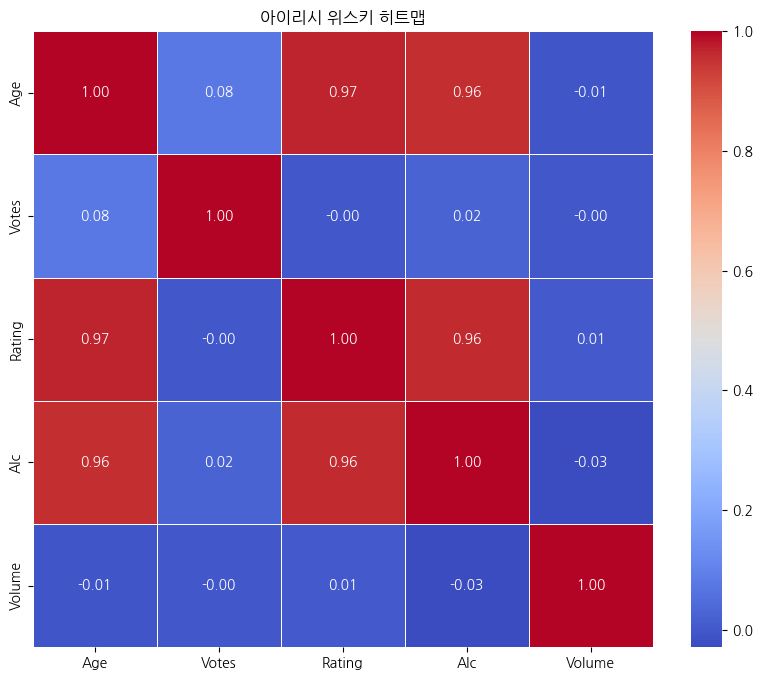

In [293]:
correlation_matrix = df2_Irish_Whiskey.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('아이리시 위스키 히트맵')
plt.show()

### LR 모델

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df2_Irish_Whiskey[['Age', 'Votes', 'Alc', 'Volume']]
y = df2_Irish_Whiskey['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')


Mean Absolute Error (MAE): 3.15
Mean Squared Error (MSE): 20.76
R² Score: 0.99


### 결측값을 다르게 채우기

In [295]:
df3 = pd.read_csv(r'C:\Users\a\Desktop\mini_project\07 통계 추정(아이리스 위스키)\userratings_raw_xx.csv')

In [296]:
df3_Irish_Whiskey = df2[df2['Whisky'].str.contains('Bushmills|Jameson|Red Breast', case=False, na=False)]

df3_Irish_Whiskey.drop(columns=['No. of Bottles','Cask Number','user','User Rating'],inplace=True)

df3_Irish_Whiskey.set_index(keys = 'Whisky',inplace=True)

df3_Irish_Whiskey.columns = ['Age','Alc','Volume','Votes','Rating']

df3_Irish_Whiskey.dropna(inplace=True)

df3_Irish_Whiskey['Age'] = pd.to_numeric(df3_Irish_Whiskey['Age'], errors='coerce')

df3_Irish_Whiskey['Age'].fillna(3, inplace=True)

df3_Irish_Whiskey['Age'] = df3_Irish_Whiskey['Age'].astype('int32')

df3_Irish_Whiskey['Votes'] = df3_Irish_Whiskey['Votes'].astype('float64')

df3_Irish_Whiskey['Rating'] = df3_Irish_Whiskey['Rating'].astype('float64')

Alc2 = []
for i in range(len(df3_Irish_Whiskey)):
    Alc2.append(df3_Irish_Whiskey['Alc'].str.split(' ')[i][0])

df3_Irish_Whiskey.drop(columns='Alc',inplace=True)

df3_Irish_Whiskey['Alc'] = Alc2

df3_Irish_Whiskey['Alc'] = df3_Irish_Whiskey['Alc'].astype('float64')

df3_Irish_Whiskey[df3_Irish_Whiskey['Volume'] == '-'] = 700

df3_Irish_Whiskey['Volume'] = df3_Irish_Whiskey['Volume'].astype(str)

Volume2 = df3_Irish_Whiskey['Volume'].str.split(' ').str[0]

df3_Irish_Whiskey.drop(columns='Volume', inplace=True)
df3_Irish_Whiskey['Volume'] = Volume2

df3_Irish_Whiskey['Volume'] = df3_Irish_Whiskey['Volume'].astype('float64')

In [297]:
df3_Irish_Whiskey.corr()

,Age,Votes,Rating,Alc,Volume
Age,1.000000,0.074895,0.962744,0.922610,-0.008435
Votes,0.074895,1.000000,-0.002352,0.023565,-0.001713
Rating,0.962744,-0.002352,1.000000,0.961915,0.005642
Alc,0.922610,0.023565,0.961915,1.000000,-0.029197
Volume,-0.008435,-0.001713,0.005642,-0.029197,1.000000


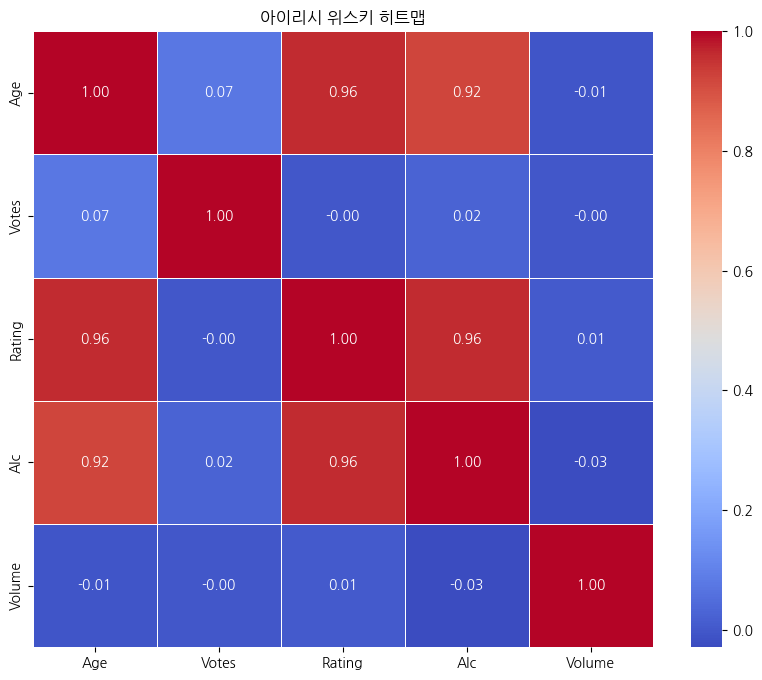

In [298]:
correlation_matrix = df3_Irish_Whiskey.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('아이리시 위스키 히트맵')
plt.show()

In [299]:
X = df3_Irish_Whiskey[['Age', 'Votes', 'Alc', 'Volume']]
y = df3_Irish_Whiskey['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Absolute Error (MAE): 3.33
Mean Squared Error (MSE): 118.88
R² Score: 0.94


In [300]:
df3_Irish_Whiskey['Rating'].mean()

83.00205741626793

### 워드 클라우드

In [301]:
df_word = pd.read_csv(r'C:\Users\a\Desktop\mini_project\07 통계 추정(아이리스 위스키)\Whiskey.csv')

In [302]:
df_word_irish = df_word[df_word['Brand'].str.contains("Bushmills|Jameson|Red Breast|West Cork|Tullamore Due|Teeling|Connemara|McConnell's", case=False, na=False)]

In [303]:
df_word_irish.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Name', 'Country', 'Brand', 'Categories',
       'Tasting Notes', 'ABV', 'Base Ingredient', 'Years Aged', 'Rating',
       'Rate Count', 'Price', 'Volume', 'Description'],
      dtype='object')

In [304]:
len(df_word_irish)

46

In [305]:
df_word_irish_cloud = ''
for i in range(len(df_word_irish)):
    df_word_irish_cloud+' '+str(df_word_irish.iloc[i]['Description'])

In [306]:
df_word_irish_cloud

''

In [307]:
df_word_irish2 = df_word_irish['Description'].dropna()

In [308]:
df_word_irish2.iloc[1]

'A bright amber hue in the glass, Jameson Black Barrel offers butterscotch and maple notes in the perfume. Flavors of green apple, butterscotch and mineral are evoked on the palate, with a salt caramel finish.'

In [309]:
df_word_irish2

887     Perhaps the most notable whiskey on earth, Jam...
888     A bright amber hue in the glass, Jameson Black...
889     Irish Whiskey Infused With Natural Cold Brew C...
890     When the Jameson Master Distiller met the Mast...
891     The flagship Jameson whiskey finished in barre...
892     Matured for 18 years in hand-selected oak cask...
893     Jameson Bow Street 18 Years is a special blend...
894     Matured for a minimum of 12 years in oloroso s...
895     Charring is an age-old method for invigorating...
896     This is the Distiller's Safe expression from J...
897     Five generations of influence: When you have a...
898     The Blender’s Dog - part of the Whiskey Makers...
899     Jameson Gold Reserve has been the toast of whi...
900     Twice charred for a good measure. Black Barrel...
901     At Jameson, we’ve been bringing neighborhoods ...
902     Jameson Whiskey is produced from a mixture of ...
906     At Jameson, we’ve been bringing neighborhoods ...
1580    Bushmi

In [310]:
len(df_word_irish2)

38

In [311]:
df_word_irish_cloud = []
for i in range(len(df_word_irish2)):
    df_word_irish_cloud.append(df_word_irish2.iloc[i].split(' '))

In [312]:
len(df_word_irish_cloud)

38

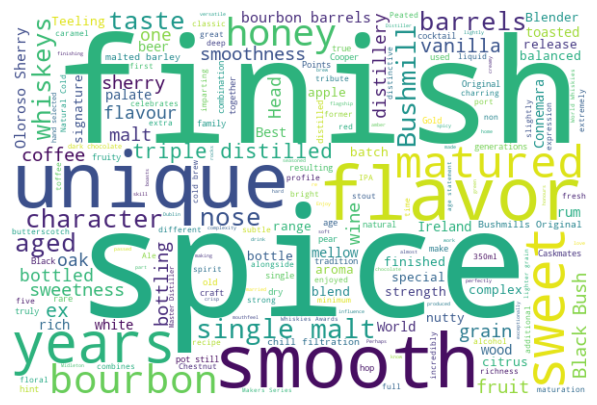

In [320]:
from itertools import chain
from wordcloud import STOPWORDS

flat_list = list(chain.from_iterable(df_word_irish_cloud))

text = ' '.join(flat_list)

STOPWORDS.add('whiskey')
STOPWORDS.add('Irish')
STOPWORDS.add('Jameson')
STOPWORDS.add('notes')
STOPWORDS.add('barrel')
STOPWORDS.add('cask')
STOPWORDS.add('year')
STOPWORDS.add('casks')
STOPWORDS.add('S')

wordcloud = WordCloud(width=600, height=400, background_color='white',stopwords=STOPWORDS).generate(text)


plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()